Load Libraries and dataset

In [ ]:
# Load pandas
import pandas as pd

# Load numpy
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
housing = pd.read_csv('/content/housing.csv')

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data exploration

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


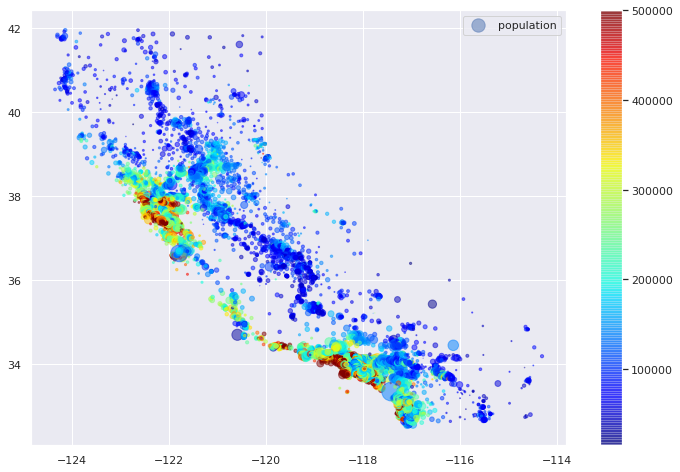

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.5, cmap=plt.get_cmap('jet'),
            c=housing['median_house_value'], s=housing['population']/100, label='population')
plt.colorbar()
plt.legend()
plt.show()

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Data Preprocessing

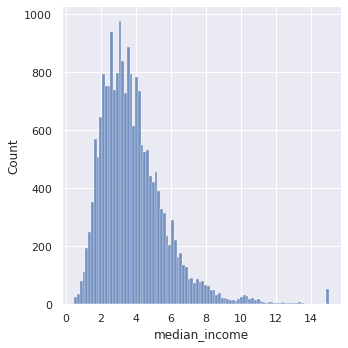

In [ ]:
sns.displot(housing['median_income'])

In [ ]:
q = housing['median_income'].quantile(0.99)
housing_1 = housing[housing['median_income'] < q]

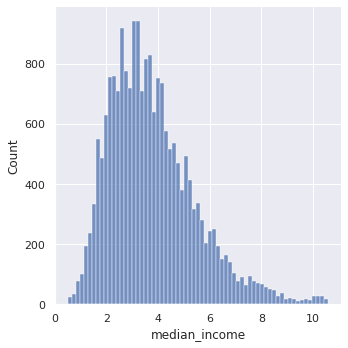

In [ ]:
sns.displot(housing_1['median_income'])

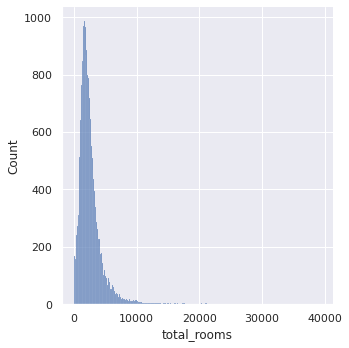

In [ ]:
sns.displot(housing['total_rooms'])

In [ ]:
q = housing_1['total_rooms'].quantile(0.99)
housing_2 = housing_1[housing_1['total_rooms'] < q]

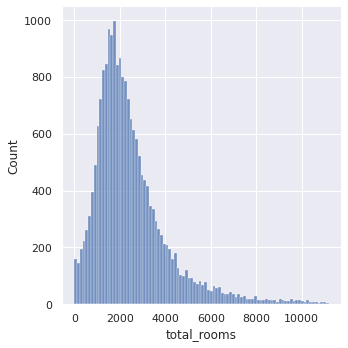

In [ ]:
sns.displot(housing_2['total_rooms'])

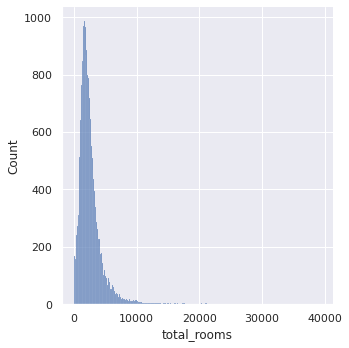

In [ ]:
sns.displot(housing['total_rooms'])

In [ ]:
q = housing_1['total_rooms'].quantile(0.99)
housing_2 = housing_1[housing_1['total_rooms'] < q]

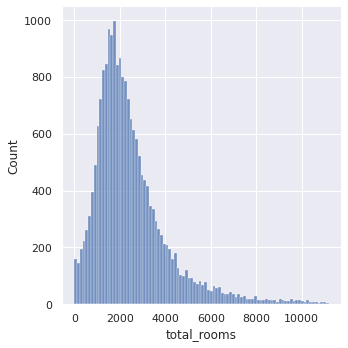

In [ ]:
sns.displot(housing_2['total_rooms'])

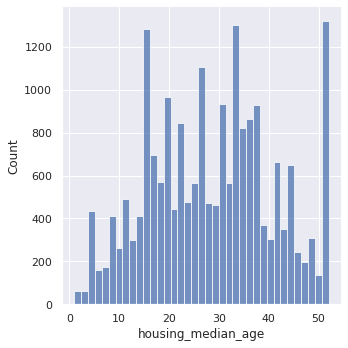

In [ ]:
sns.displot(housing['housing_median_age'])

In [ ]:
q = housing_2['housing_median_age'].quantile(0.99)
housing_3 = housing_2[housing_2['housing_median_age'] < q]

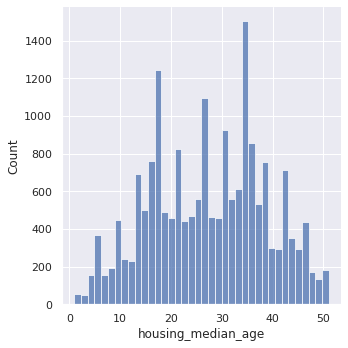

In [ ]:
sns.displot(housing_3['housing_median_age'])

In [ ]:
housing_3.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18987.000000,18987.000000,18987.000000,18987.000000,18791.000000,18987.000000,18987.000000,18987.000000,18987.000000
mean,-119.488535,35.575814,27.282930,2539.881393,523.121441,1398.774319,486.765260,3.777422,199346.180439
std,1.974148,2.137538,11.322071,1673.846645,344.868350,921.060018,315.437151,1.674638,109237.125319
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.570000,33.920000,18.000000,1457.000000,299.000000,802.000000,282.000000,2.554700,117100.000000
50%,-118.450000,34.230000,28.000000,2136.000000,438.000000,1186.000000,412.000000,3.512900,175000.000000
75%,-117.980000,37.650000,36.000000,3155.500000,648.000000,1745.000000,606.000000,4.695700,253500.000000
max,-114.310000,41.950000,51.000000,11181.000000,3638.000000,11272.000000,3405.000000,10.594100,500001.000000


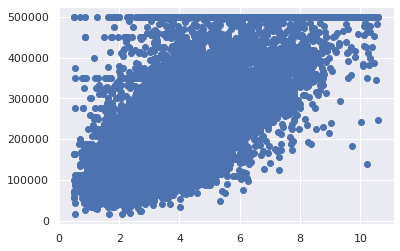

In [ ]:
plt.scatter(housing_3['median_income'], housing_3['median_house_value'])

Data Preparation

In [ ]:
housing_labels = housing_3['median_house_value'].copy()
housing = housing_3.drop(['median_house_value'], axis=1)

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [ ]:
num_attribs = list(housing.select_dtypes(include=np.number))
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

array([[-1.38871877,  1.0779912 ,  1.21156547, ...,  0.        ,
         1.        ,  0.        ],
       [-1.38365316,  1.06863439, -0.55494226, ...,  0.        ,
         1.        ,  0.        ],
       [-1.40391559,  1.05927758,  1.29989085, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.87709228,  1.80314374, -0.9082438 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.92774836,  1.80314374, -0.81991841, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88722349,  1.77507332, -0.99656919, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, test_size=0.3)

Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

Regression Linear

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictions = lin_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test, predictions))

63486.10557399172

In [ ]:
lin_reg.score(x_test, y_test)

0.6504090383111678

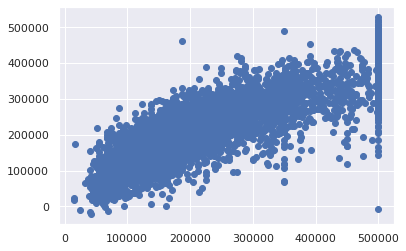

In [ ]:
plt.scatter(y_test, predictions)

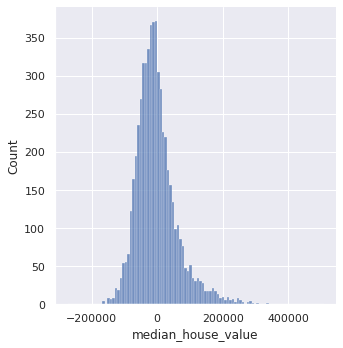

In [ ]:
sns.displot(y_test - predictions)

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest_reg.score(x_test, y_test)

0.797650486748308

In [ ]:
forest_predictions = forest_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test, forest_predictions))

48300.28252119848

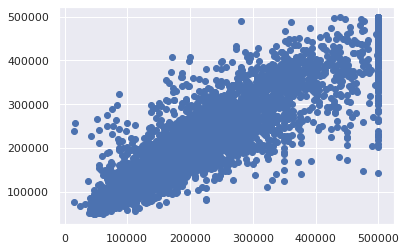

In [ ]:
plt.scatter(y_test, forest_predictions)

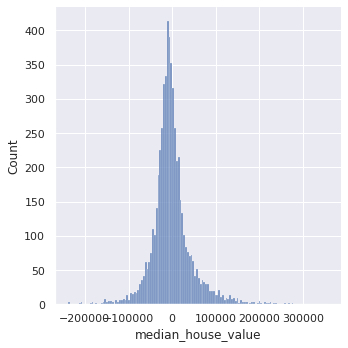

In [ ]:
sns.displot(y_test - forest_predictions)

In [ ]:
scores = cross_val_score(forest_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [ ]:
forest_rmse_scores.mean()

48915.3740965529

Hyperparameters tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators' : [120, 130, 140], 'max_features' : [6, 8], 'bootstrap' : [True, False]},
]

forest_reg2 = RandomForestRegressor()

grid_search_forest = GridSearchCV(
    forest_reg2, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True
)

In [ ]:
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False], 'max_features': [6, 8],
                          'n_estimators': [120, 130, 140]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Best Model

In [ ]:
forest_reg3 = RandomForestRegressor(max_features=6, n_estimators=130, bootstrap=False)
forest_reg3.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=130)

In [ ]:
forest_reg3.score(x_test, y_test)

0.7991285473077813

In [ ]:
np.sqrt(mean_squared_error(y_test, forest_reg3.predict(x_test)))

49011.866100869054

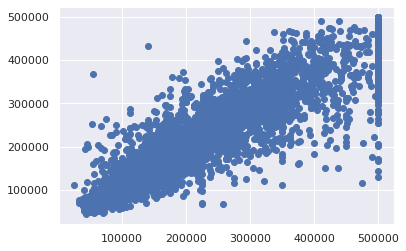

In [ ]:
plt.scatter(y_test, forest_reg3.predict(x_test))